In [53]:
import numpy as np
import matplotlib.pyplot as plt

states=[0,1,2,3,4,5,6]
actions=[-1,1]
lr=0.1
V_true=np.arange(1,6)/6.0

def step(s,a):
      
    s_=s+a
    
    if s_==0:
        return s_,0,True
    elif s_==6:
        return s_,1,True 
    else:
        return s_,0,False


def get_v(n_eps):
    
    V=np.ones(len(states))*0.5
    
    
    for ep in range(n_eps):

        s=np.random.choice(states[1:6])

        while True:     

            s_old=s
            #v_all.append(V[s_old])
            a=np.random.choice(actions)
            s,r,done=step(s_old,a)

            if done:
                V[s_old]+=lr*(r-V[s_old])
            else:
                V[s_old]+=lr*(r+V[s]-V[s_old])

            #traj.append(s)
            #rs.append(r)
            if done:
                break
                
    return V

v1=get_v(1)
v10=get_v(10)
v100=get_v(100)

In [49]:
v1

array([0.5       , 0.157309  , 0.31789283, 0.5202803 , 0.69308613,
       0.89471641, 0.5       ])

In [51]:
v10
v100

array([0.5       , 0.157309  , 0.31789283, 0.5202803 , 0.69308613,
       0.89471641, 0.5       ])

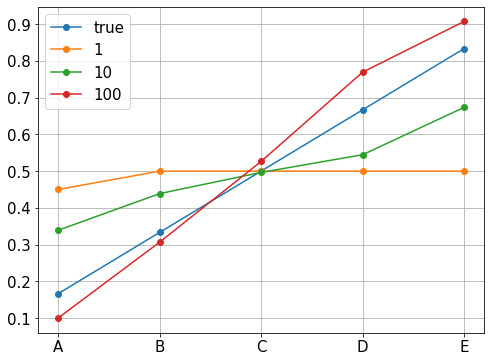

In [64]:
plt.figure(figsize=(8,6))
plt.plot(range(1,6),V_true,'-o',label='true')
plt.plot(range(1,6),v1[1:6],'-o',label='1')
plt.plot(range(1,6),v10[1:6],'-o',label='10')
plt.plot(range(1,6),v100[1:6],'-o',label='100')
plt.grid()
plt.xticks(range(1,6),('A','B','C','D','E'),fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig('td_randomwalk.png',dpi=350)